In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1171,2020-08-01,United Kingdom,303274.0,303181.0,46126.0,46119.0,93.0,7.0
1172,2020-08-01,Germany,207942.0,209653.0,9142.0,9148.0,-1711.0,-6.0
1173,2020-08-01,Iran,305058.0,304204.0,16764.0,16766.0,854.0,-2.0
1174,2020-08-01,Turkey,230781.0,230873.0,5687.0,5691.0,-92.0,-4.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3636.483843537415
RMSE =  10877.603936005642


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  290.21683673469386
RMSE =  685.1519798878331


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  20263.256637168142
RMSE =  31752.96824227131
-- World performances for deaths --
MAE =  1558.070796460177
RMSE =  1897.5923590334007


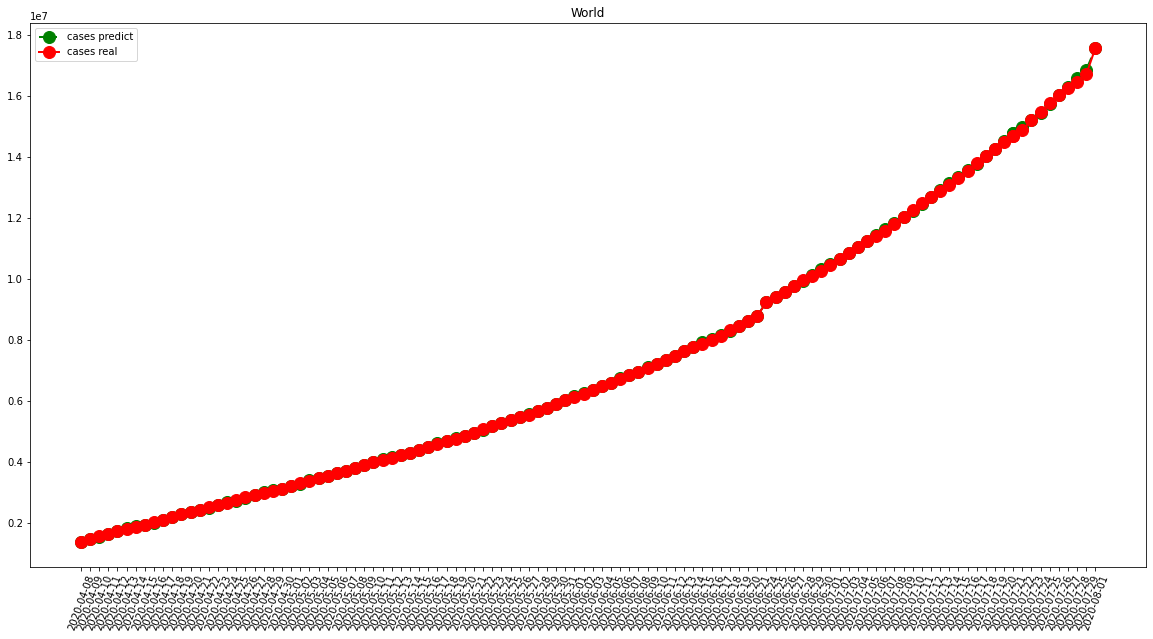

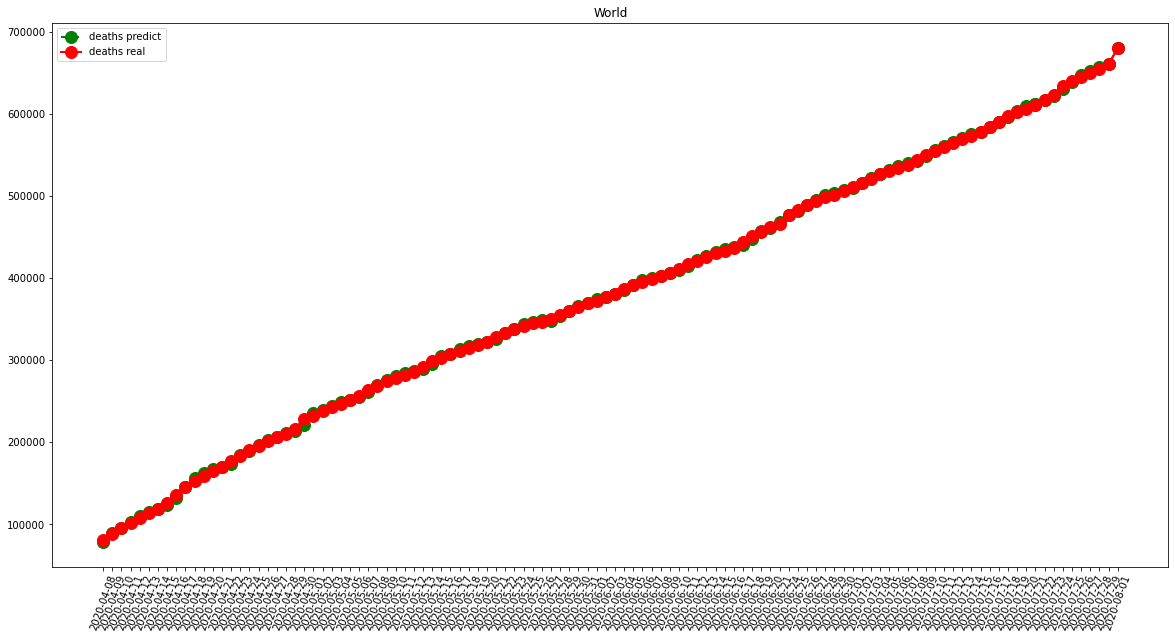

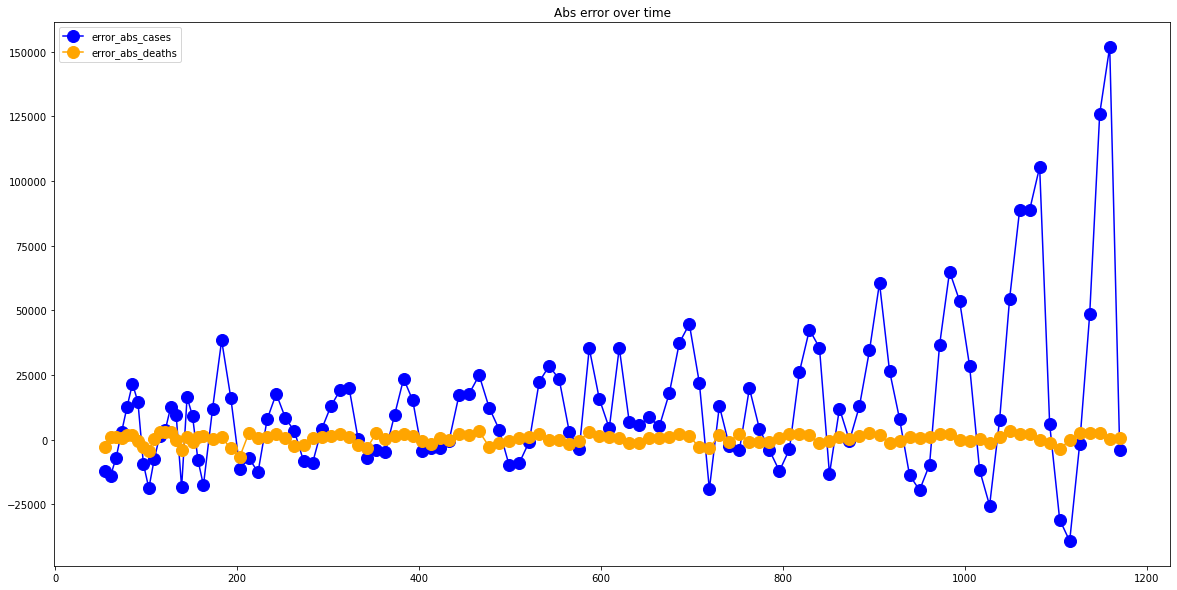

In [7]:
visShow("World")

-- France performances for cases --
MAE =  848.7154471544716
RMSE =  1367.9489720906633
-- France performances for deaths --
MAE =  146.7479674796748
RMSE =  302.1939290119961


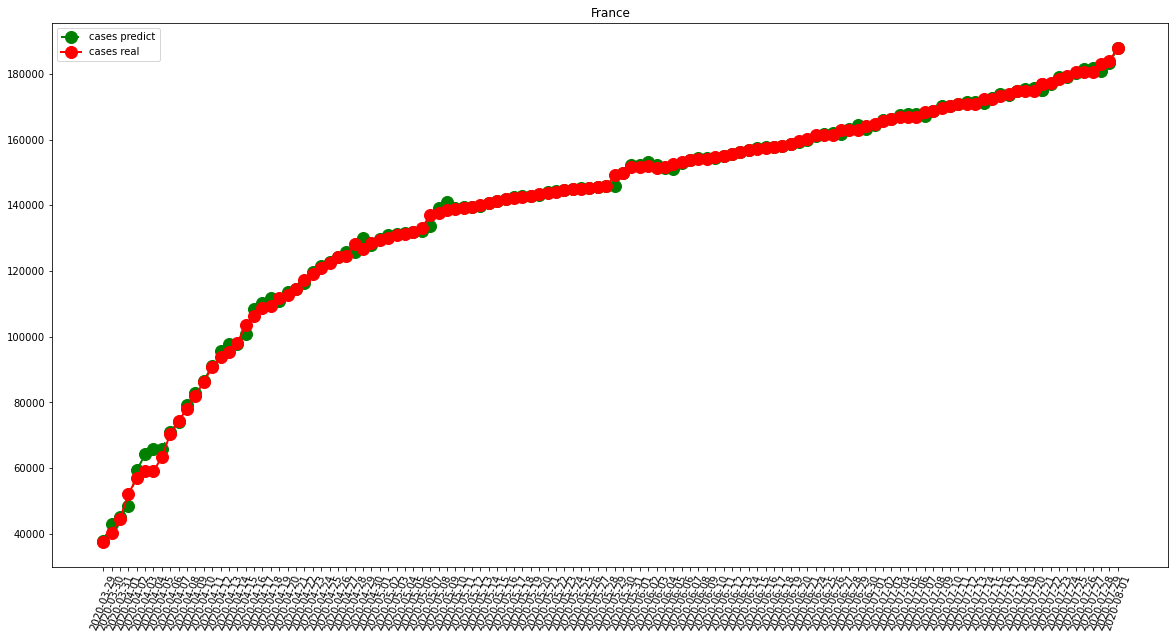

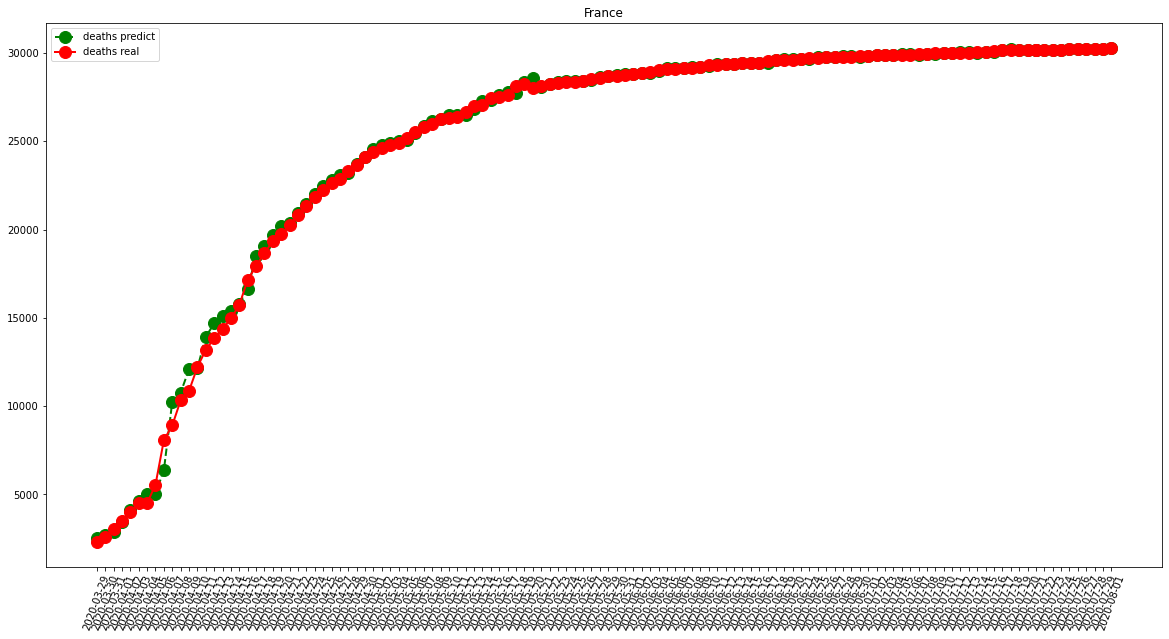

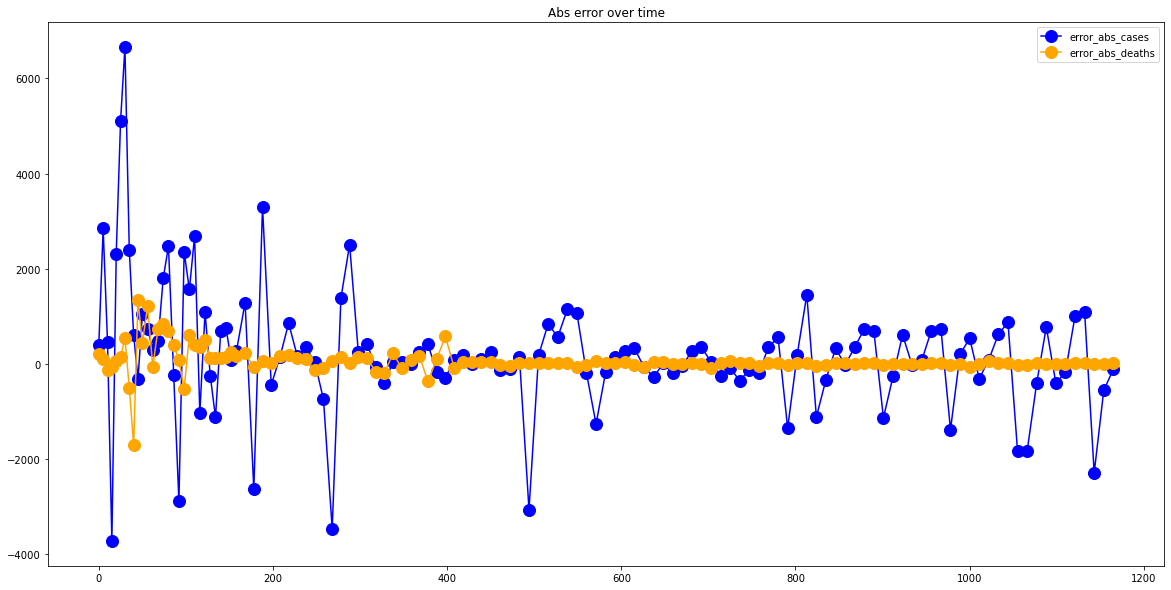

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  325.8211382113821
RMSE =  492.84904267106845
-- Italy performances for deaths --
MAE =  83.72357723577235
RMSE =  266.8652411060105


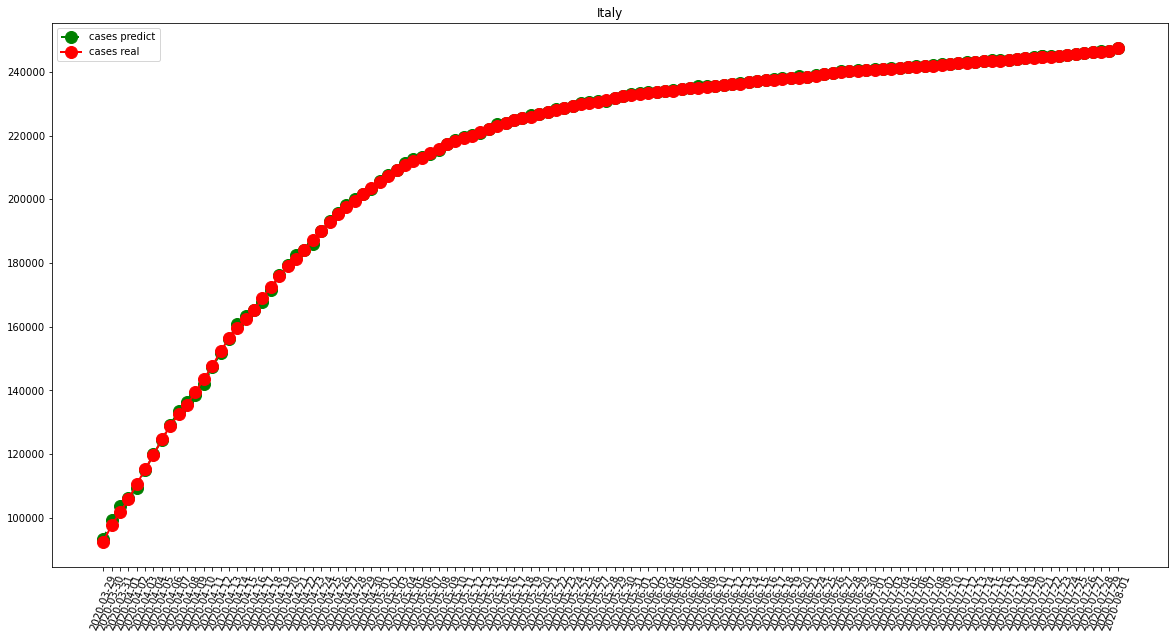

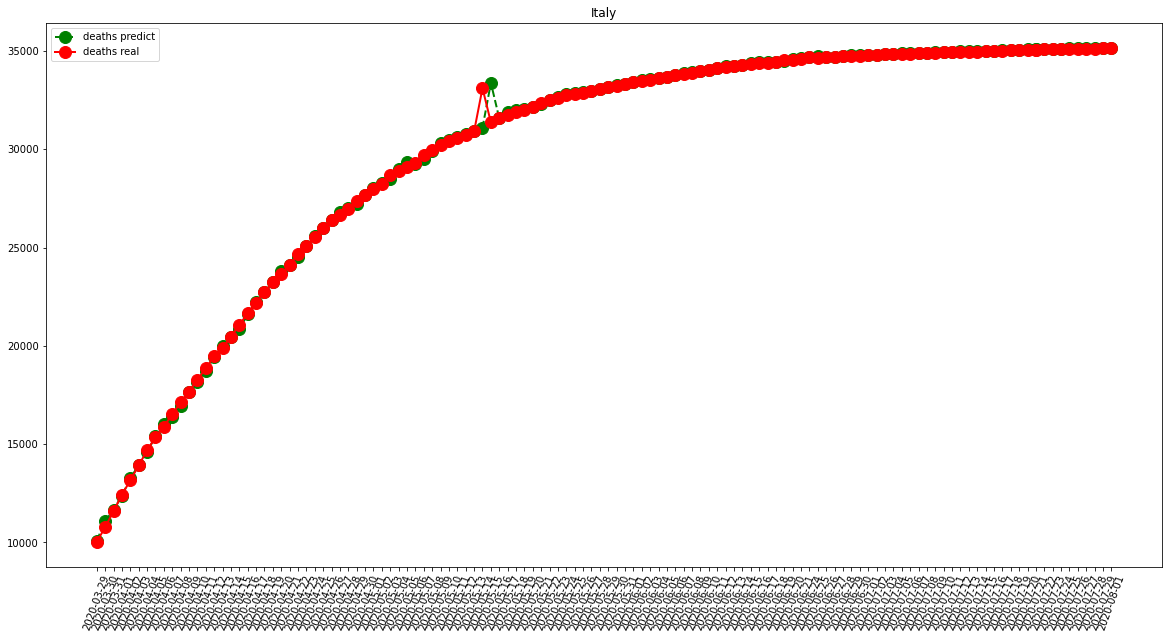

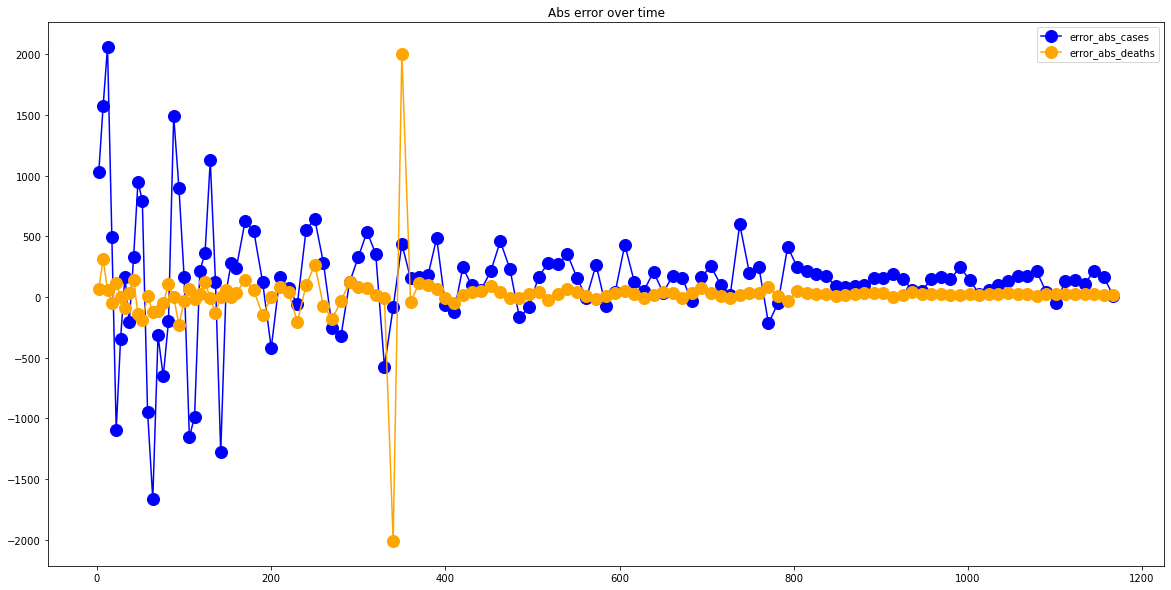

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1012.5365853658536
RMSE =  2087.120449892081
-- Spain performances for deaths --
MAE =  149.66666666666666
RMSE =  366.00854092837824


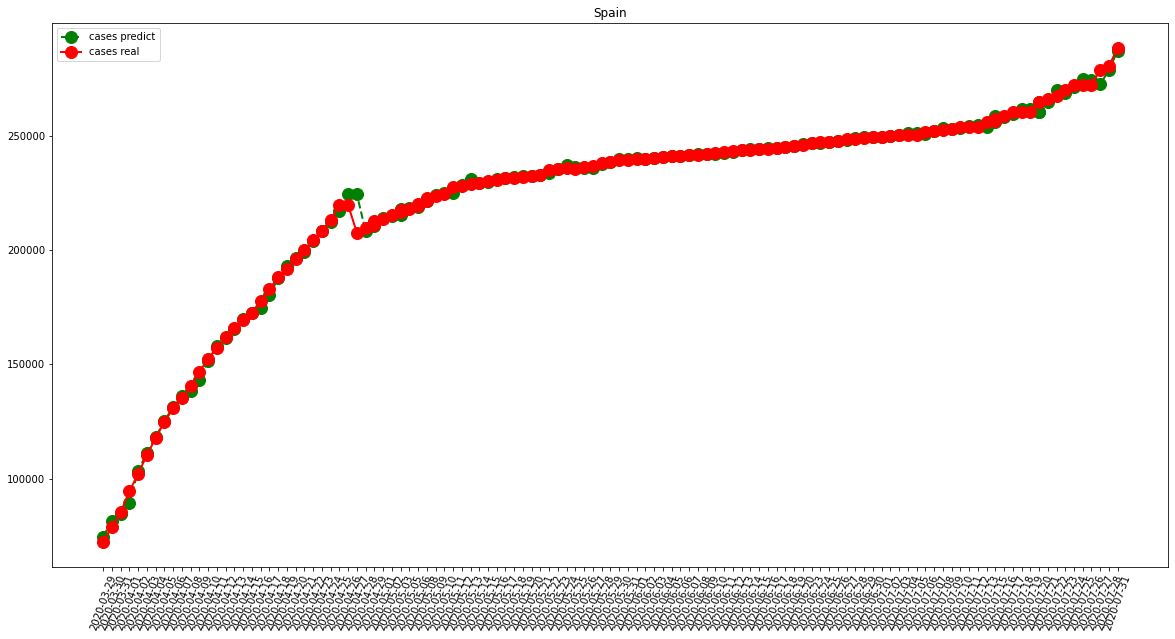

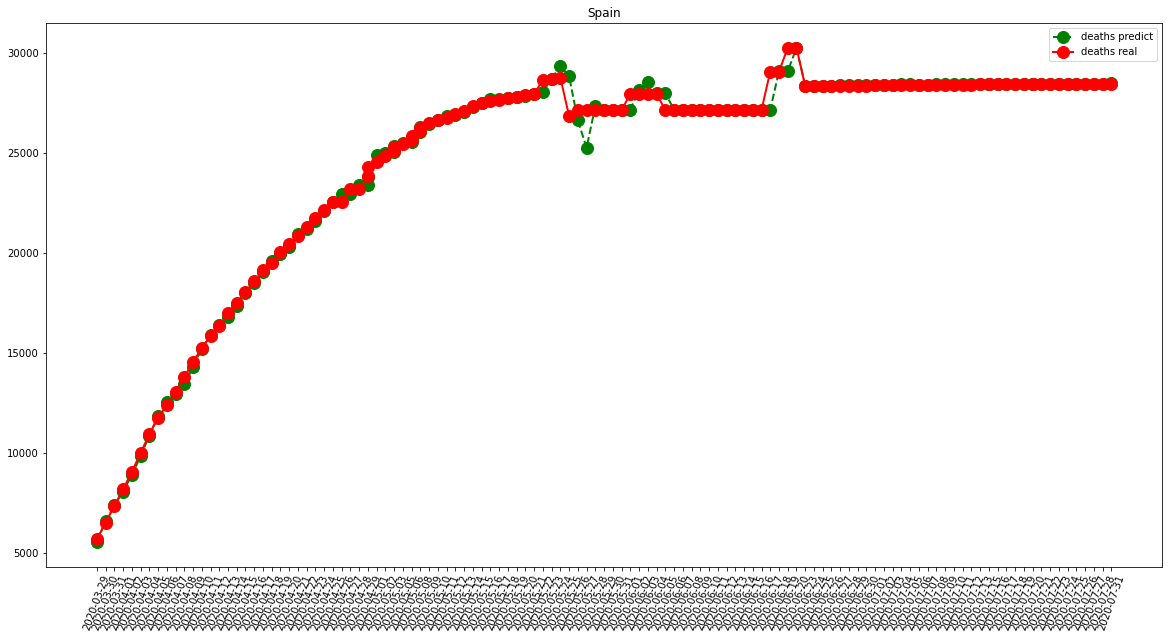

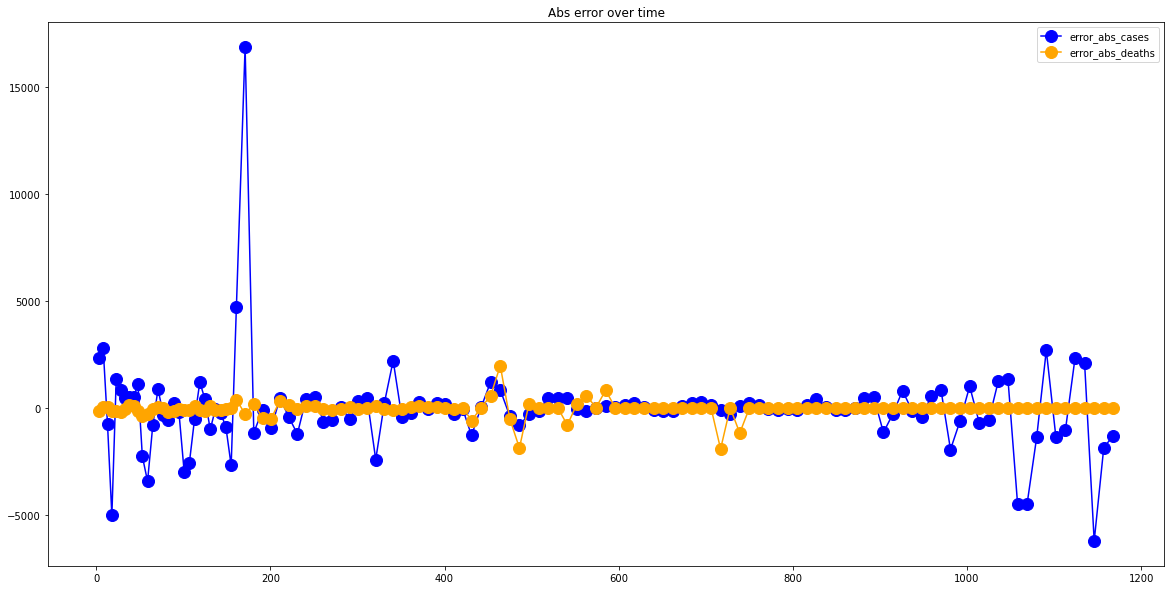

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5784.471544715447
RMSE =  7735.711596384591
-- United States performances for deaths --
MAE =  500.1056910569106
RMSE =  726.3713635073847


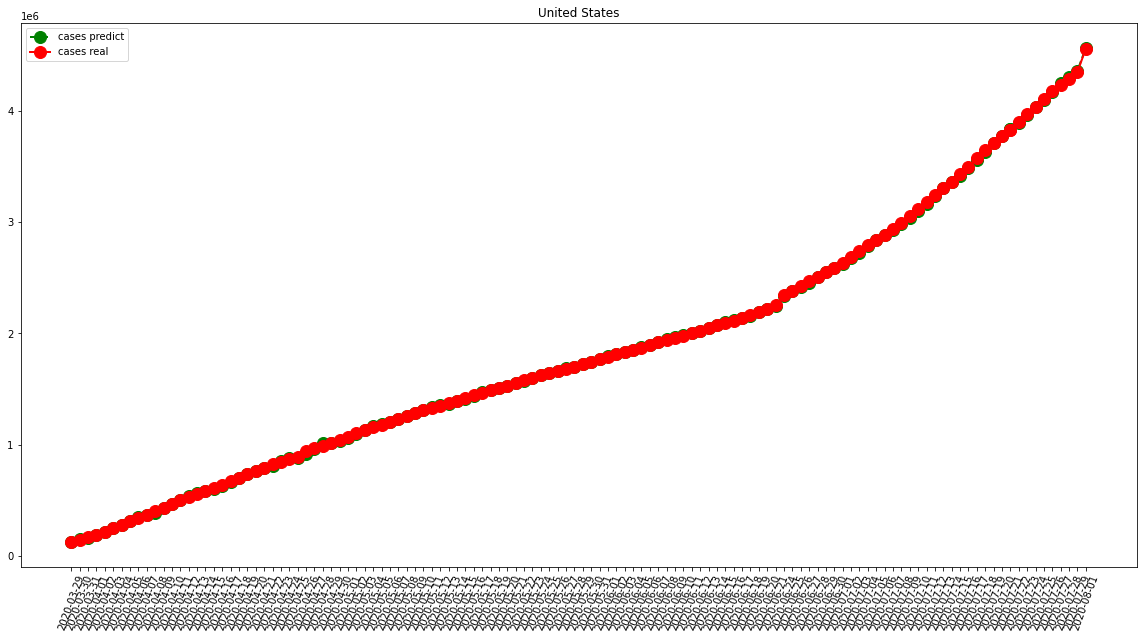

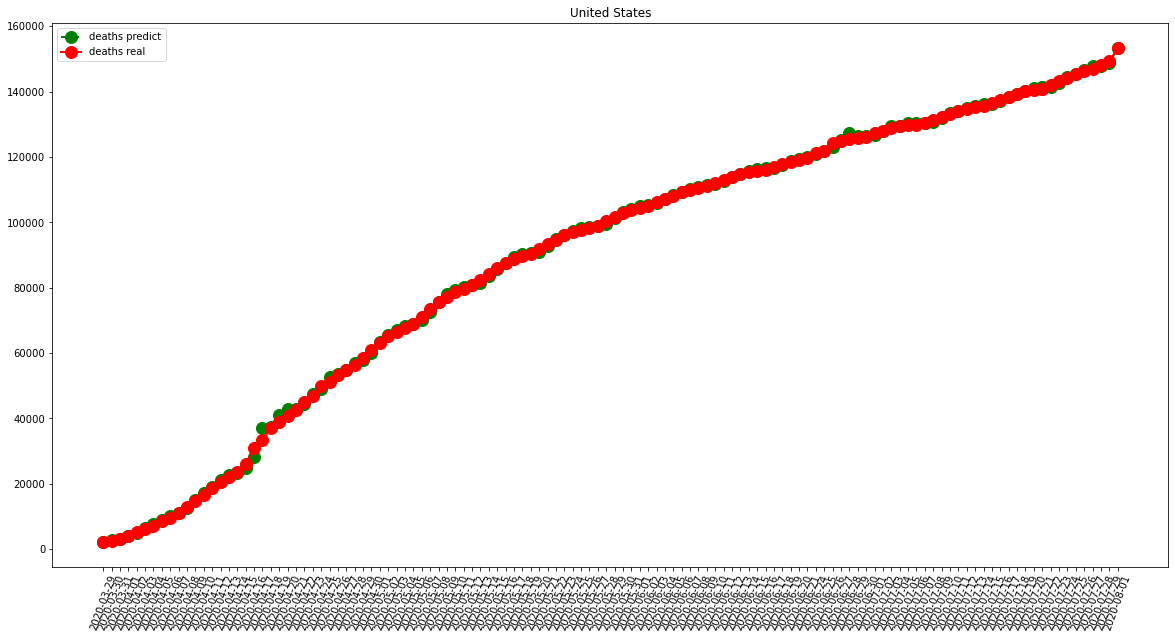

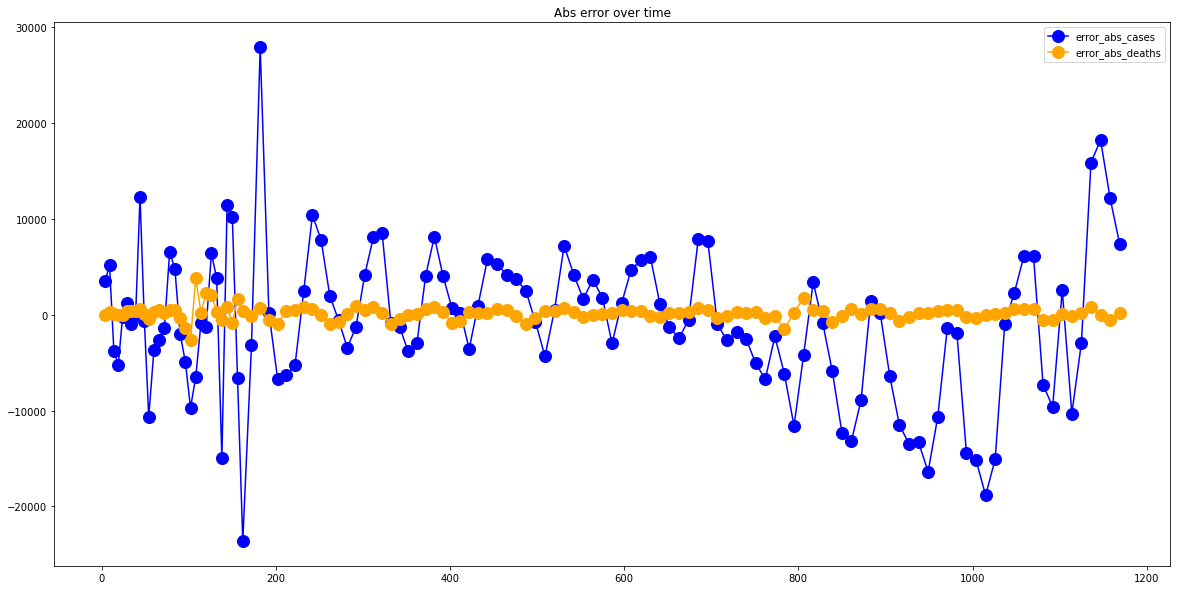

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  78.0569105691057
RMSE =  107.23740853180799
-- China performances for deaths --
MAE =  32.6910569105691
RMSE =  141.55883031102084


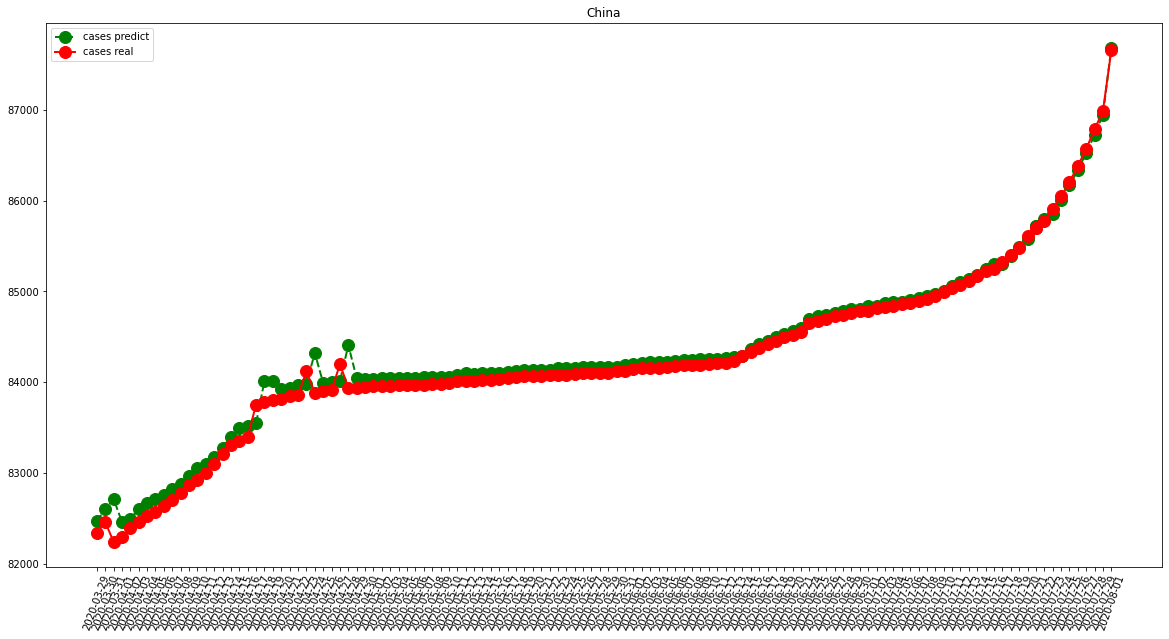

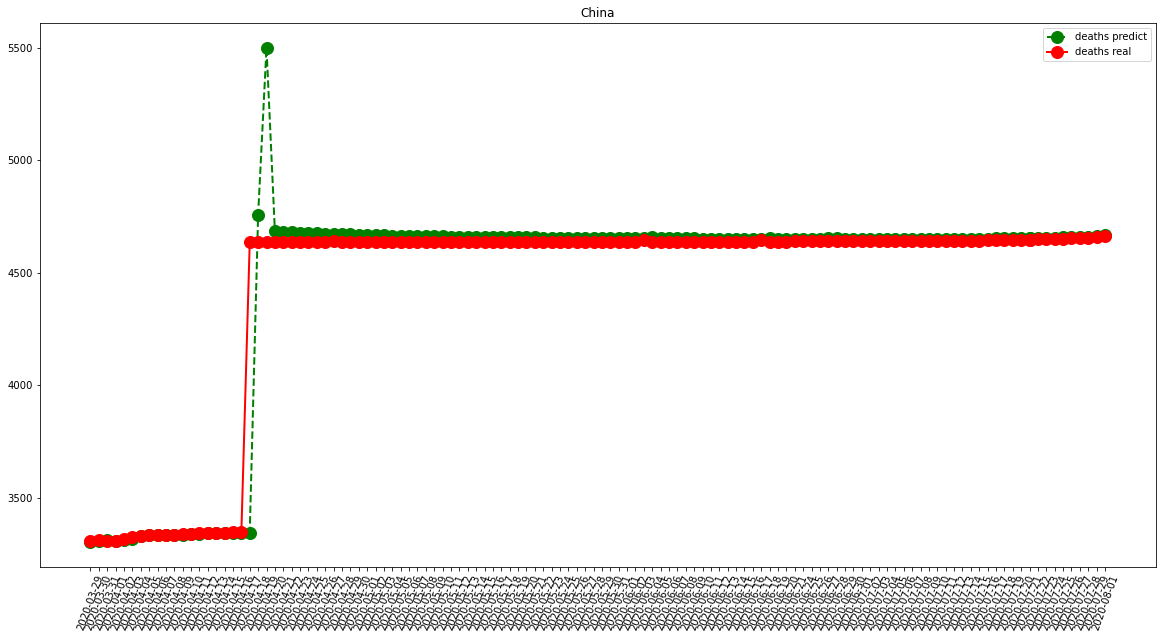

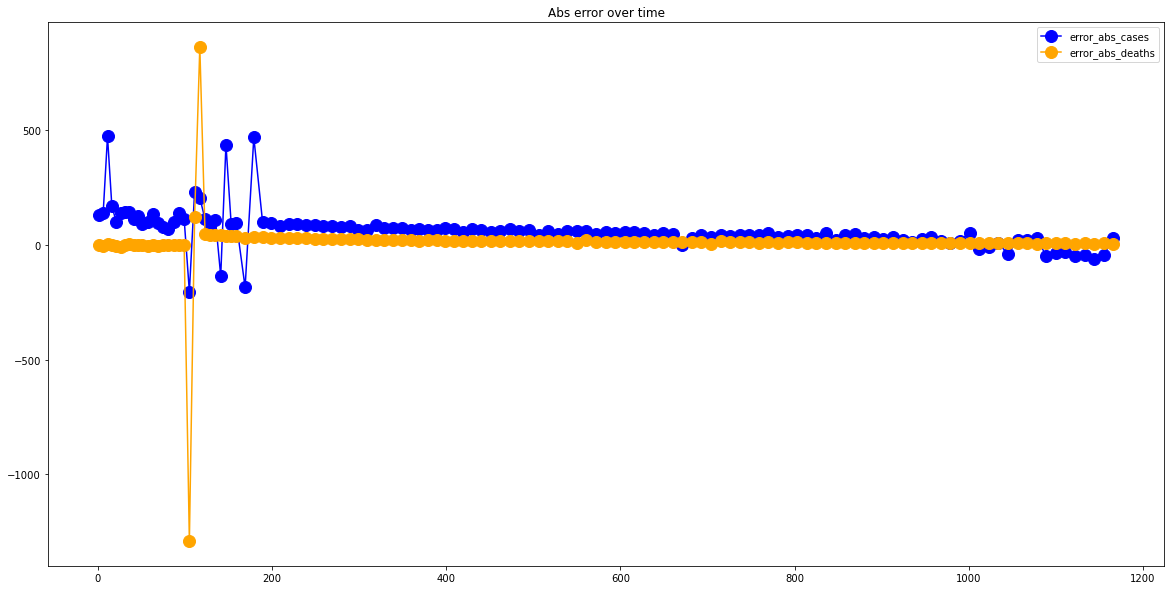

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1289.0631578947368
RMSE =  4281.990654873158
-- United Kingdom performances for deaths --
MAE =  201.43157894736842
RMSE =  503.5154312170425


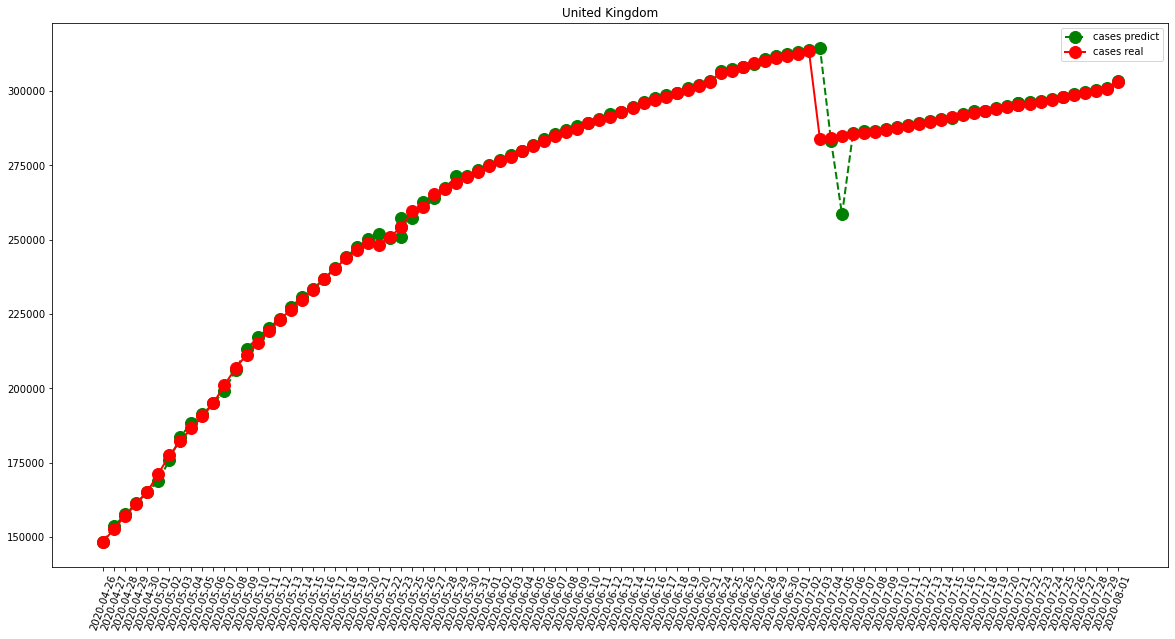

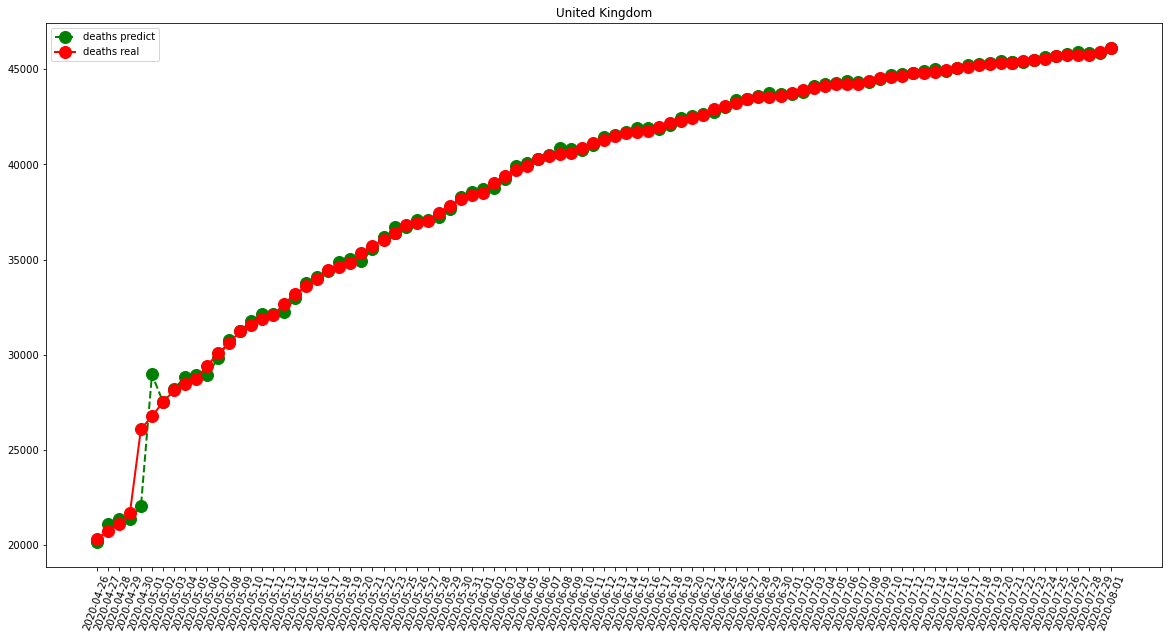

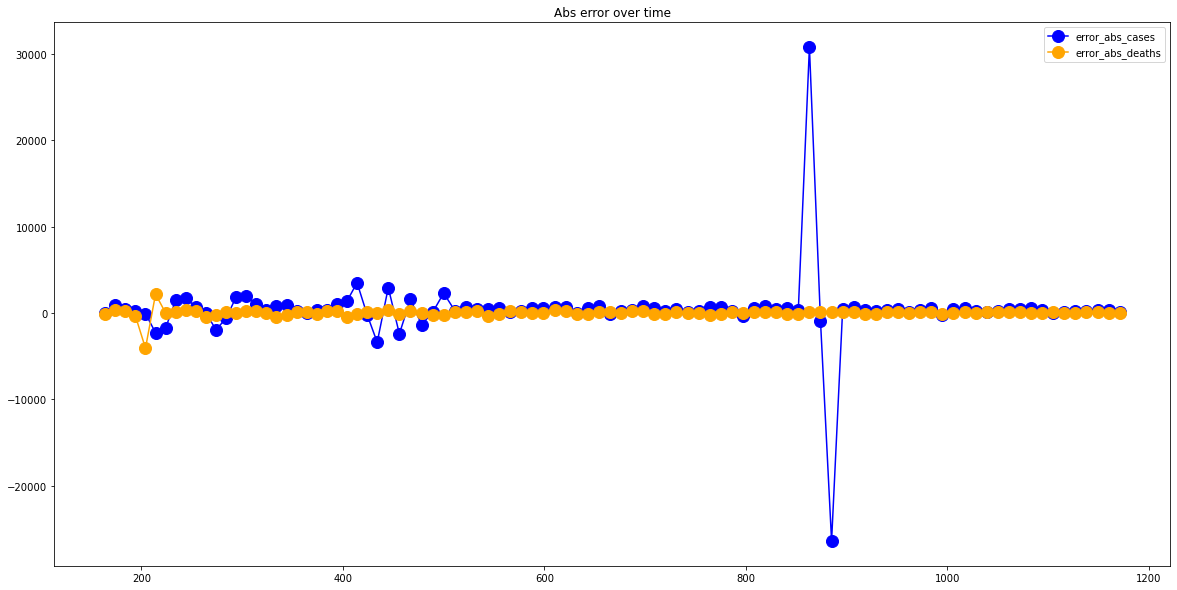

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  308.89473684210526
RMSE =  441.0129369149116
-- Germany performances for deaths --
MAE =  25.51578947368421
RMSE =  44.85790430846462


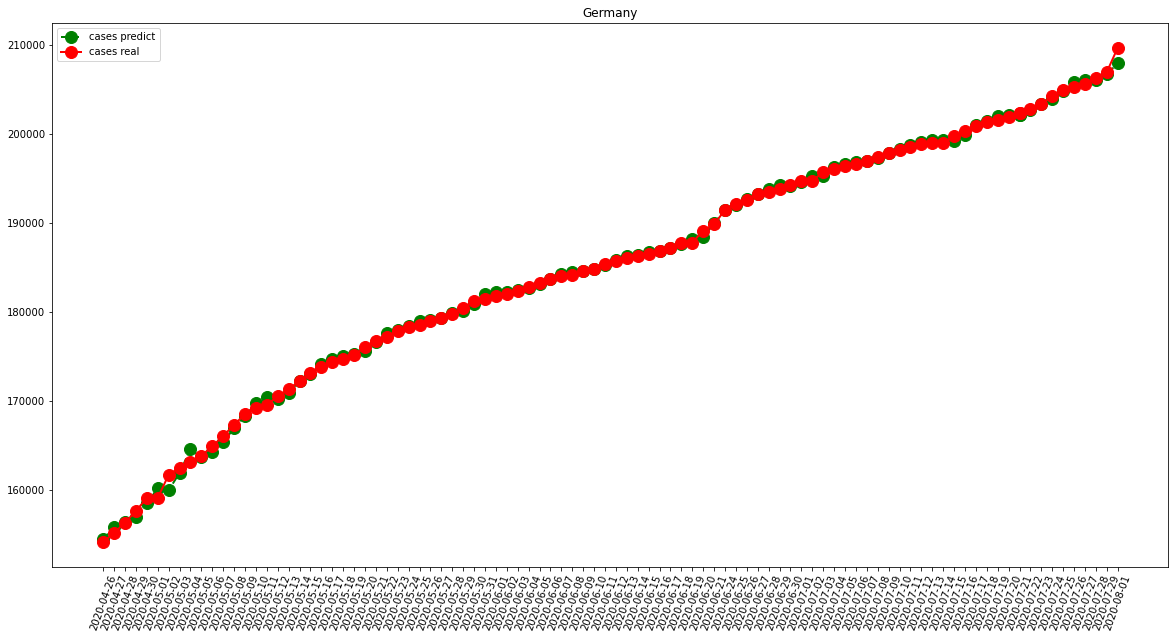

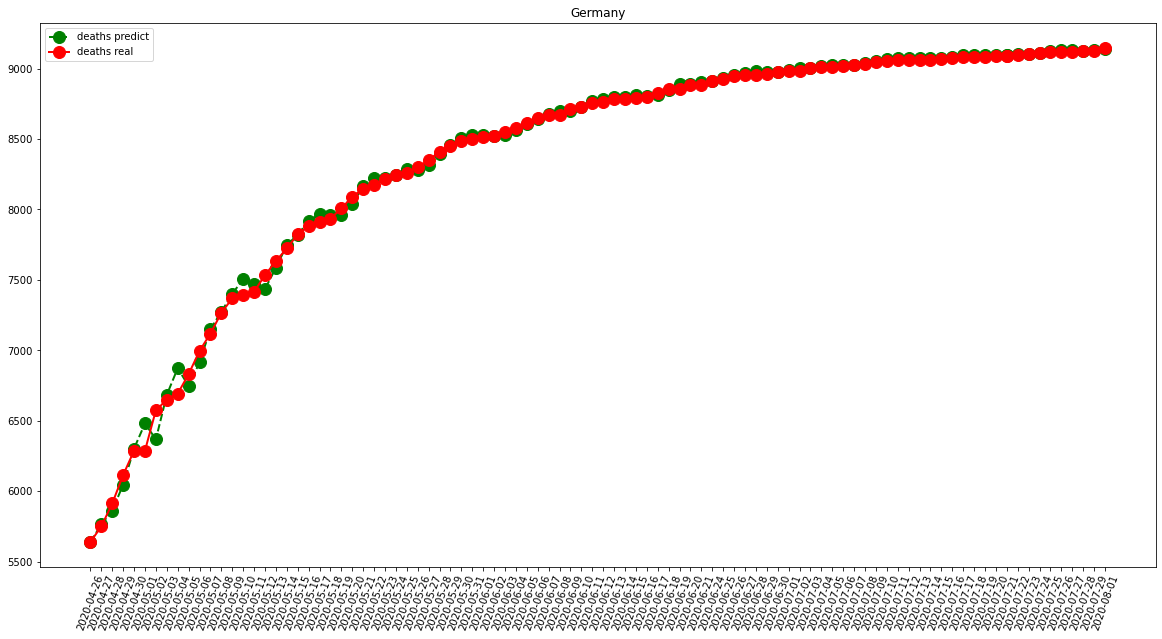

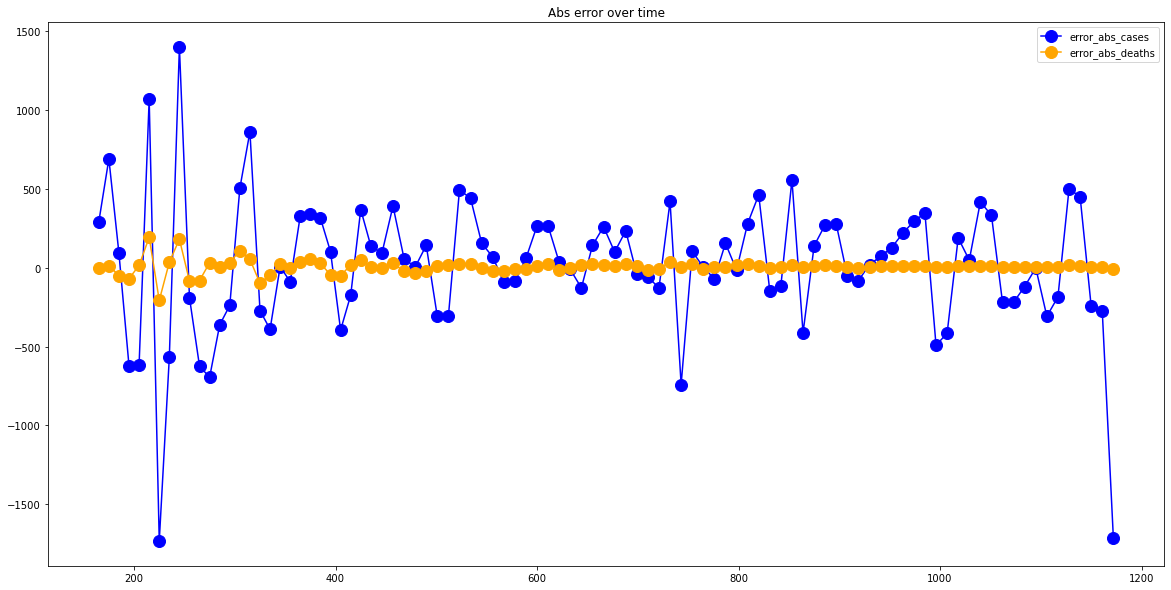

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  548.8947368421053
RMSE =  871.1808259936322
-- Iran performances for deaths --
MAE =  31.45263157894737
RMSE =  69.67307114018487


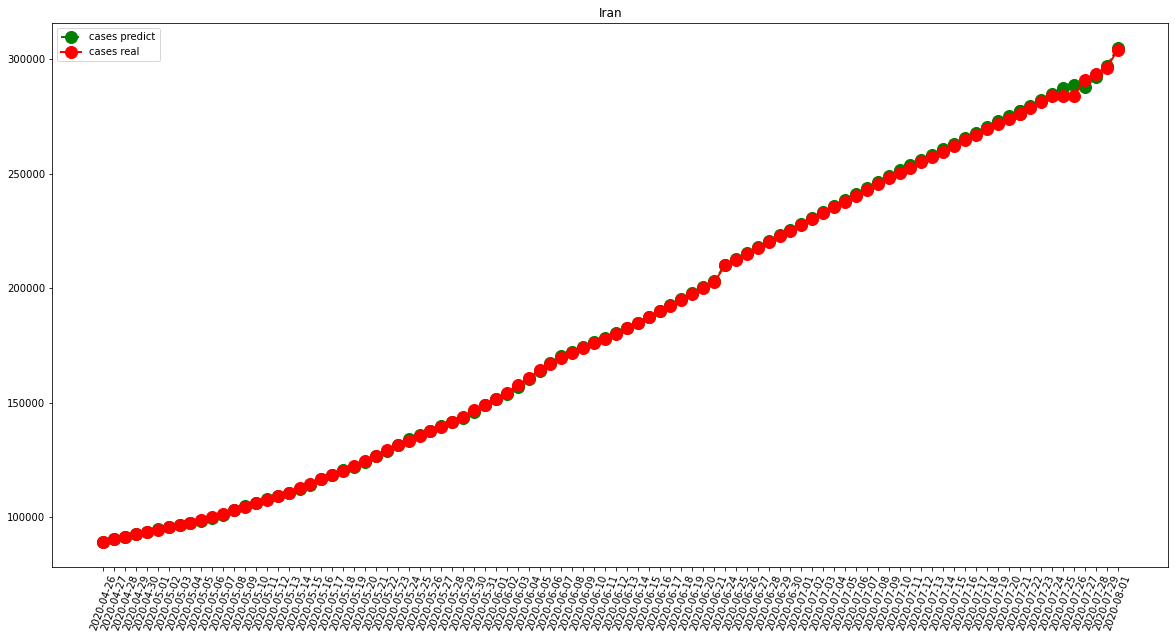

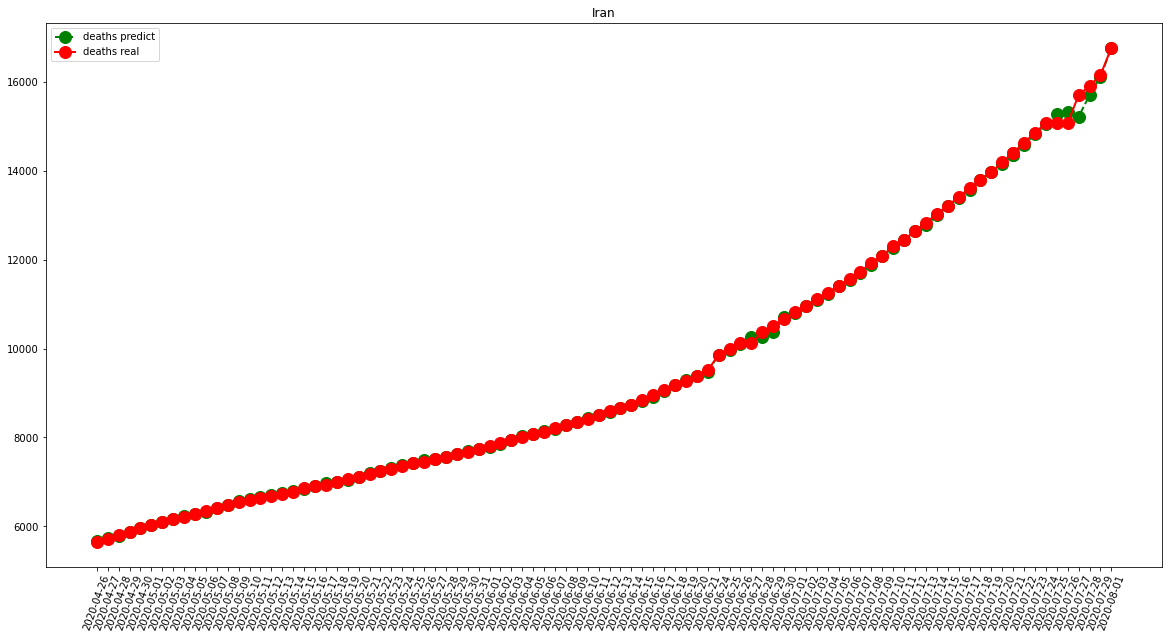

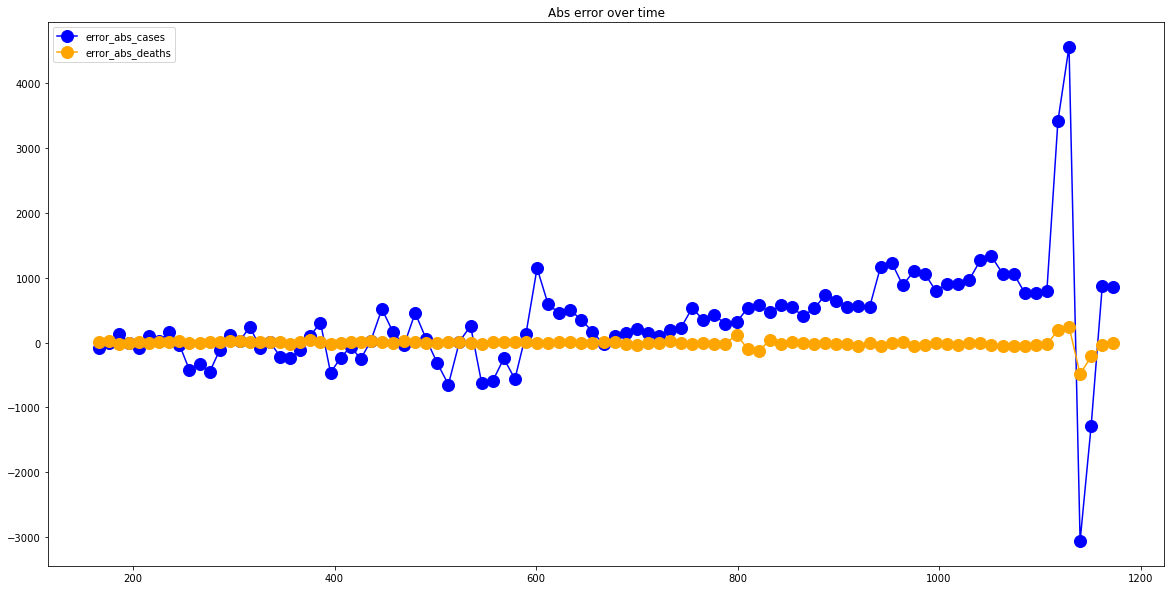

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  204.86315789473684
RMSE =  352.8746609148771
-- Turkey performances for deaths --
MAE =  19.842105263157894
RMSE =  104.1458996843017


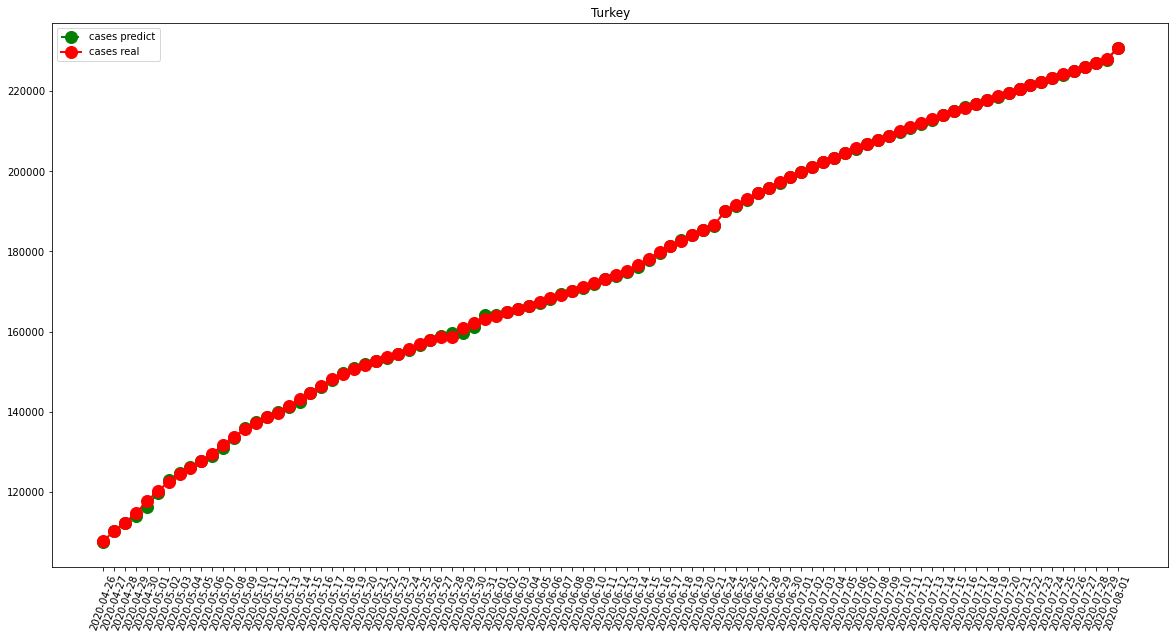

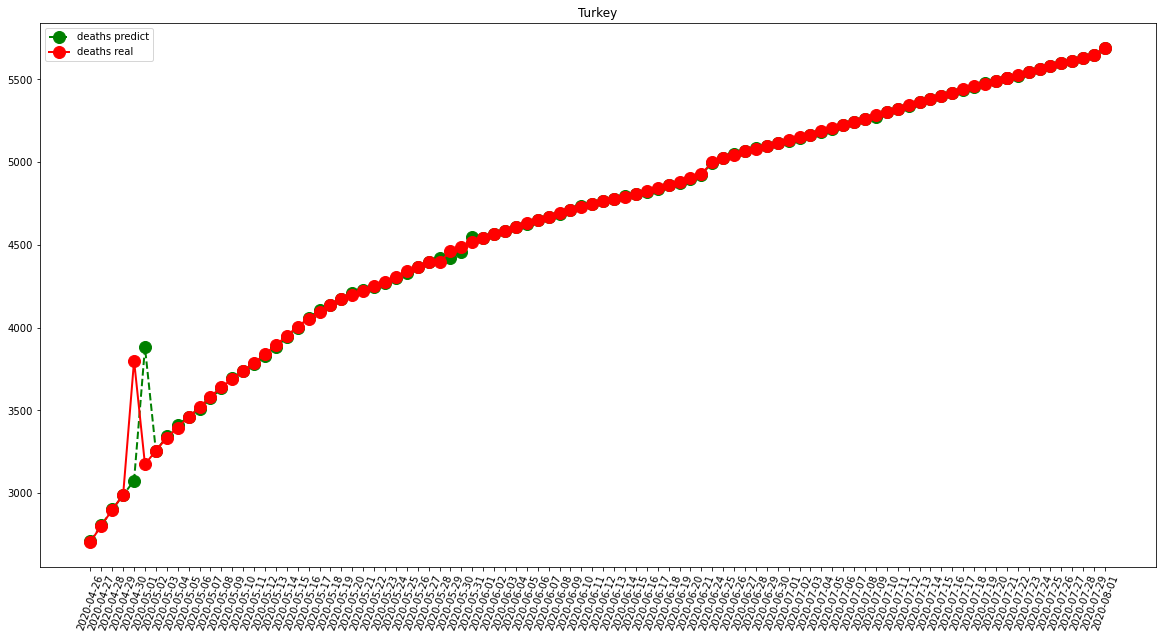

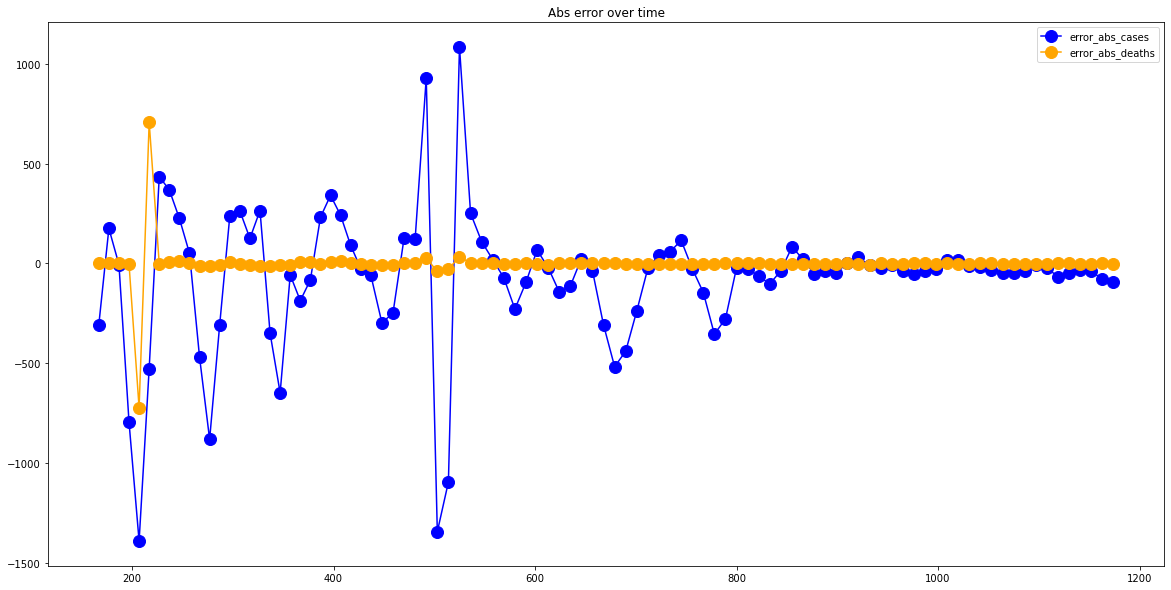

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11371.220588235294
RMSE =  14957.106474948328
-- Brazil performances for deaths --
MAE =  389.8382352941176
RMSE =  478.3207298332734


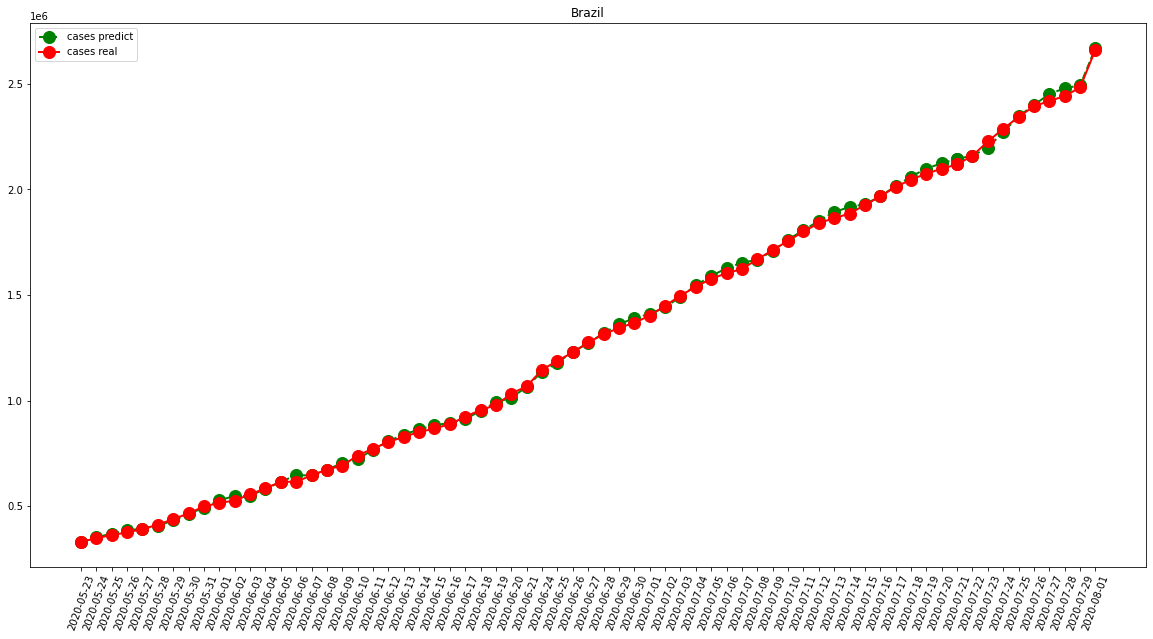

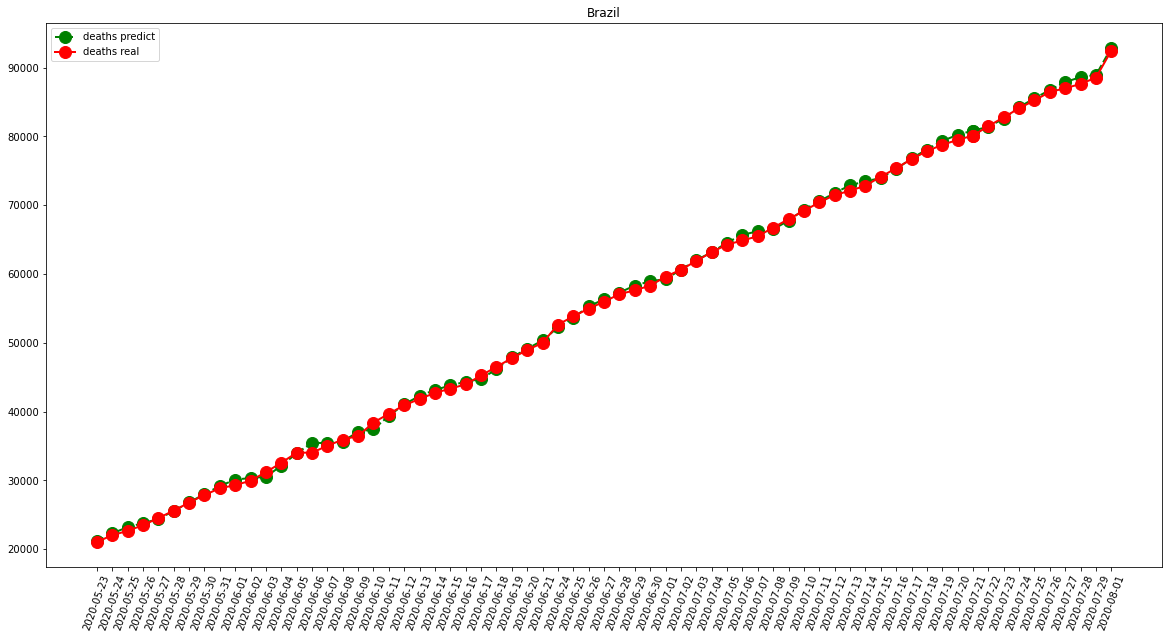

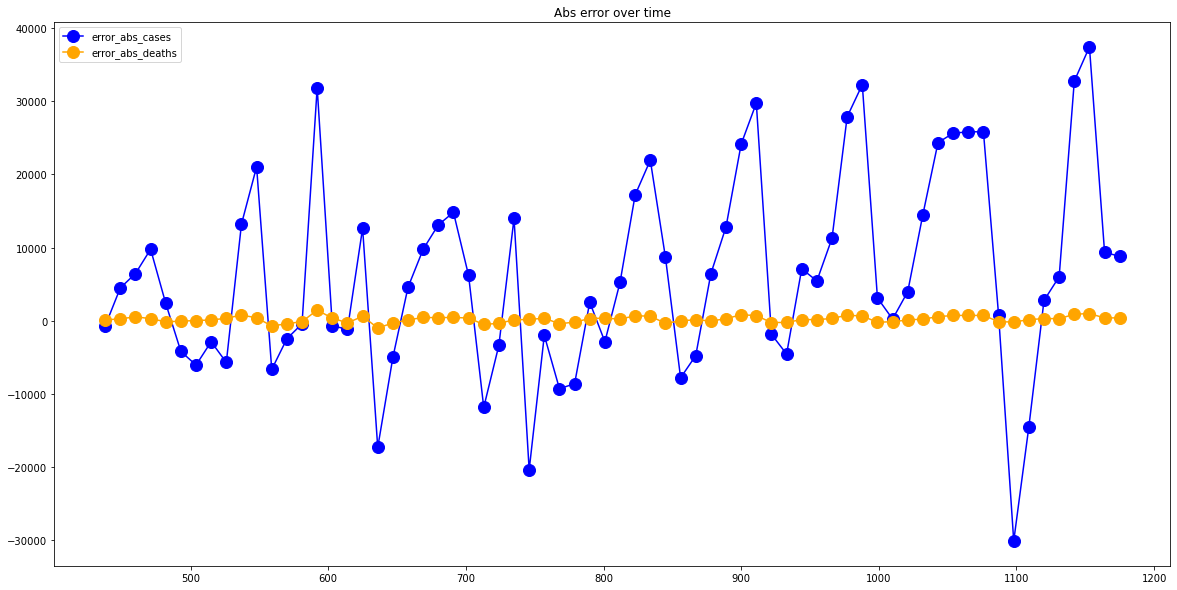

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)